In [1]:
#importing all the needed libraries to run the program
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading the stored CSV file and assigning it to variable 'IC'
IC = pd.read_csv('/content/drive/MyDrive/Regression Classification Final Exam/fixeddataset (1).csv')
IC

,Index,Age,Height,Weight,Income,Class
0,1,32,180,78,71500,1
1,2,28,165,58,25000,1
2,3,45,175,82,93500,2
3,4,35,170,65,62000,1
4,5,50,185,90,84000,1
...,...,...,...,...,...,...
195,196,28,161,57,27000,1
196,197,36,175,78,63000,1
197,198,30,163,59,20000,0
198,199,37,177,80,65000,1


In [4]:
#to get a basic overview of the IC dataframe, we use IC.shape to see how many rows and columns are present
IC.shape

(200, 6)

In [5]:
#IC.describe is used to get a better idea of the data on hand. 
IC.describe()

,Index,Age,Height,Weight,Income,Class
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,34.965000,172.660000,71.090000,54205.000000,0.965000
std,57.879185,6.494975,10.141928,13.431453,29106.164624,0.579182
min,1.000000,26.000000,155.000000,49.000000,5000.000000,0.000000
25%,50.750000,29.000000,164.000000,59.000000,27000.000000,1.000000
50%,100.500000,34.000000,173.000000,74.000000,55000.000000,1.000000
75%,150.250000,40.000000,181.000000,83.000000,83000.000000,1.000000
max,200.000000,50.000000,191.000000,95.000000,99000.000000,2.000000


In [6]:
#to begin fitting, we need a 'Data' and a 'Target' column
#we begin with the X, or Data column
x= IC.drop(["Index"," Class"], axis=1)
x

,Age,Height,Weight,Income
0,32,180,78,71500
1,28,165,58,25000
2,45,175,82,93500
3,35,170,65,62000
4,50,185,90,84000
...,...,...,...,...
195,28,161,57,27000
196,36,175,78,63000
197,30,163,59,20000
198,37,177,80,65000


In [7]:
#next, we use the 'Class' column and assign it to the target column
#here, a target value of 0 corresponds to Lower Class(0-20000)
#a target value of 1 corresponds to Middle Class(20001-90000)
#and a target value of 2 corresponds to High Class(90001+)
y= IC[" Class"]
y

0      1
1      1
2      2
3      1
4      1
      ..
195    1
196    1
197    0
198    1
199    1
Name:  Class, Length: 200, dtype: int64

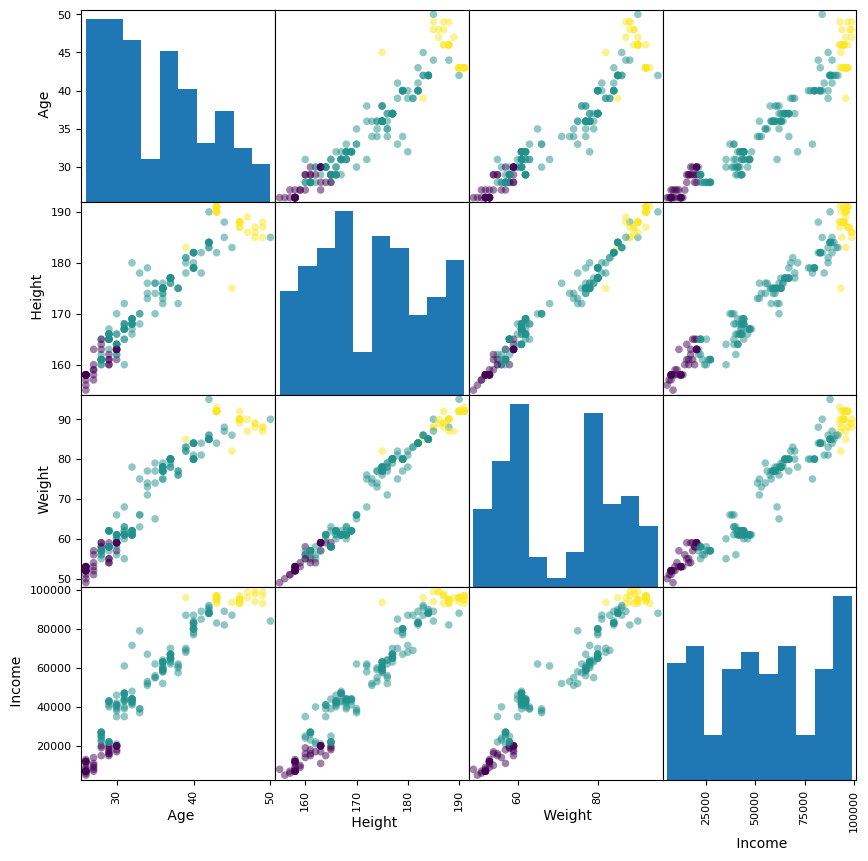

In [8]:
#The scatter_matrix function in pandas is a visualization tool that creates a grid of scatter plots to explore the relationships between multiple variables in a dataset. 
#It plots each variable against every other variable, including itself, allowing you to examine the pairwise relationships.
pd.plotting.scatter_matrix(x, c=y, figsize=[10, 10], s=120)
plt.show()

In [9]:
#now that we have both data and target columns, we import the K Nearest Neigbors Classifier library from SKLearn
from sklearn.neighbors import KNeighborsClassifier
#we make a new model using the KNeighborsClassifier command
knn = KNeighborsClassifier(n_neighbors=3, metric= 'minkowski',p=2)
#we now fit the model to the x and y columns
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

The prediction that we recieved converted 0$-20,000(lower class '0'),

21,000-91,000$(middle class '1'), 

92,000$ and above (upper class '2')

In [10]:
#to check if the model works, we give it a random value to predict
x_new = np.array([41,190,90,92000])
knn.predict([x_new])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2])

In [11]:
#The prediction that we recieved defines 0$-20,000 as 'Lower Class' (or '0'), 21,000-91,000$ as Middle Class (or '1'), 92,000$ and above as Upper Class (or '2')
#now, we split our dataset into learning data and testing data, for further testing purposes
from sklearn.model_selection import train_test_split
# This parameter ensures that the class proportions in the target variable "y" are maintained in both the training and testing sets. 
#It helps create representative subsets that preserve the same proportion of classes as the original dataset.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify= y)

In [12]:
#we use the .shape command to check if the training data and the testing data have been split
x_train.shape

(140, 4)

In [13]:
#we now fit the training data to the model, then test with the testing data and ask the model to make predictions
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)
y_predict

array([0, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1])

In [14]:
#finally, we use the score command to check how accurate our model is
#the knn.score command compares y_predict (the predicted values corresponding to x_test) to y_test (actual values)
knn.score(x_test, y_test)

0.9833333333333333